In [1]:
# Name: Gabe Eapen
# UT EID: eapengp
# PS2 - Part 2 - Q1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import linalg
from sklearn import linear_model

In [3]:
df=pd.read_stata("cars2010.dta")
print(df.columns)

Index([u'EngDispl', u'NumCyl', u'Transmission', u'FE', u'AirAspirationMethod',
       u'NumGears', u'TransLockup', u'TransCreeperGear', u'DriveDesc',
       u'IntakeValvePerCyl', u'ExhaustValvesPerCyl', u'CarlineClassDesc',
       u'VarValveTiming', u'VarValveLift'],
      dtype='object')


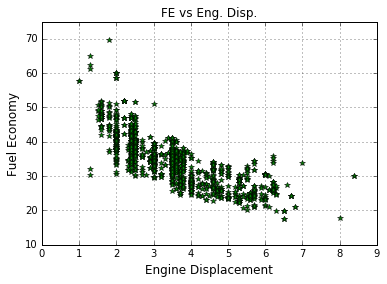

In [4]:
part_a, = plt.plot(df["EngDispl"],df["FE"],'g*')
plt.grid(True)
plt.ylabel("Fuel Economy",fontsize=12)
plt.xlabel("Engine Displacement",fontsize=12)
plt.title("FE vs Eng. Disp.")
plt.xlim(0, 9)
plt.ylim(10, 75)
plt.show()

In [5]:
#Part b
# http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.lstsq.html
# B1 = m; B0 = c
# y = B1x + B0
# y = Ap, where A = [[x 1]] and p = [[B1], [B0]]
x = df["EngDispl"]
A = np.vstack([x, np.ones(len(x))]).T
#print A
y = np.array(df["FE"])
#m, c = np.linalg.lstsq(A, y)[0]
#B1, B0 = np.linalg.lstsq(A, y)[0]
model, resid = np.linalg.lstsq(A, y)[:2]
B1, B0 = model
#np.linalg.lstsq(A, y)
print("m(B1) is: {}.".format(round(B1,8)))
print("c(B0) is: {}.".format(round(B0,8)))
r2 = 1 - resid / (y.size * y.var())
print("R2 is: {}.".format(round(r2[0],8)))

m(B1) is: -4.52092928.
c(B0) is: 50.56322991.
R2 is: 0.61998904.


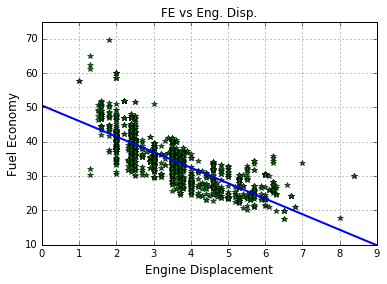

In [6]:
#Part b
# Add bestfit line to ScatterPlot using B1 and B0 values
# y = B1x + B0

part_b, = plt.plot(df["EngDispl"],df["FE"],'g*')
plt.grid(True)
plt.ylabel("Fuel Economy",fontsize=12)
plt.xlabel("Engine Displacement",fontsize=12)
plt.title("FE vs Eng. Disp.")
plt.xlim(0, 9)
plt.ylim(10, 75)
xVals = np.arange(0, 325)
yVals = (B1*xVals) + B0
plt.plot(xVals,yVals,'b-',linewidth=2.0)
plt.show()

In [7]:
# Part C
# Plot the residual errors. Now sum the residual errors. What do you find?
# compute the predicted value for EngDispl
def predictedVals(coeff,intercept,engDisp):
    y_vals=list()
    for x in np.nditer(engDisp):
        y_vals.append((coeff * x )+ intercept)
    return y_vals

In [8]:
yPredict=predictedVals(B1,B0,df.as_matrix(["EngDispl"]))

In [9]:
# compute residual errors
residualErrors=[]
Y_FE = df.as_matrix(["FE"])
for i in np.arange(len(Y_FE)):
    residualErrors.append(Y_FE[i]-yPredict[i])

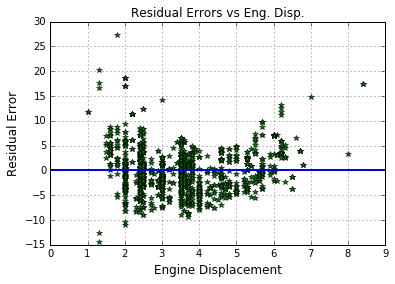

In [10]:
part_c, = plt.plot(df["EngDispl"],residualErrors,'g*')
plt.grid(True)
plt.ylabel("Residual Error",fontsize=12)
plt.xlabel("Engine Displacement",fontsize=12)
plt.title("Residual Errors vs Eng. Disp.")
plt.xlim(0, 9)
xVals1 = np.arange(0, 325)
yVals1 = (0*xVals) 
plt.plot(xVals1,yVals1,'b-',linewidth=2.0)
plt.show()

In [11]:
#Sum of residual errors
print "Sum of Residual Errors: ",np.sum(residualErrors)


Sum of Residual Errors:  -2.2055246518e-11


In [12]:
# Part D
# Now do the same where you fit a linear regression for FE on both EngDispl and NumCyl.
# Report the R2 value. Sum the residual errors. What do you find?
X1 = df.as_matrix(["EngDispl","NumCyl"])
FE_Y = df.as_matrix(["FE"])
model_lr = linear_model.LinearRegression()
model_lr.fit(X1,FE_Y)
print "Coeff, B0:", model_lr.coef_, model_lr.intercept_
print "r2 = ", model_lr.score(X1,FE_Y)


Coeff, B0: [[-3.74535214 -0.58802919]] [ 51.35414193]
r2 =  0.623958939799


In [13]:
def predictedVals1(coeff,intercept,X):
    y_vals1=list()
    for x in np.arange(len(X)):
        y_vals1.append(np.dot(coeff,X[x]) + intercept )
    return y_vals1


In [14]:
#yPredict=predictedVals(B1,B0,df.as_matrix(["EngDispl"]))
yPredict_D=predictedVals1(model_lr.coef_,model_lr.intercept_,X1)

In [15]:
# compute residual errors
residualErrors_D=[]
for i in np.arange(len(FE_Y)):
    residualErrors_D.append(FE_Y[i]-yPredict_D[i])

In [16]:
#Sum of residual errors
print "Sum of Residual Errors: ",np.sum(residualErrors_D)


Sum of Residual Errors:  0.0


In [17]:
#PART E
#Now solve the OLS regression problem for FE against all the variables. Report the R2
#value. Sum the residual errors. What do you find?

In [18]:
X1 = df.as_matrix(["EngDispl","NumCyl","Transmission","NumGears","IntakeValvePerCyl",
                   "ExhaustValvesPerCyl","AirAspirationMethod","TransLockup",
                   "TransCreeperGear","DriveDesc","CarlineClassDesc","VarValveTiming",
                   "VarValveLift"])
FE_Y = df.as_matrix(["FE"])
model_lr = linear_model.LinearRegression()
model_lr.fit(X1,FE_Y)
print "Coeff, B0:", model_lr.coef_, model_lr.intercept_
print "r2 = ", model_lr.score(X1,FE_Y)



Coeff, B0: [[-3.73881937 -0.59854429  0.09853067 -0.26103154 -0.46677908 -1.41290715
  -0.32029424 -0.74947468 -0.75500417  0.83699599 -0.27189826  1.63506899
   0.8440168 ]] [ 54.26927826]
r2 =  0.707406484867


In [19]:
yPredict_E=predictedVals1(model_lr.coef_,model_lr.intercept_,X1)

In [20]:
# compute residual errors
residualErrors_E=[]
for i in np.arange(len(FE_Y)):
    residualErrors_E.append(FE_Y[i]-yPredict_E[i])

In [ ]:
#Sum of residual errors
print "Sum of Residual Errors: ",np.sum(residualErrors_D)
